# Import packages

In [ ]:
# !pip install -r multiff_analysis/requirements.txt

In [ ]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break
    
from data_wrangling import general_utils, specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, ml_decoder_class, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils
from neural_data_analysis.topic_based_neural_analysis.target_decoder import behav_features_to_keep, target_decoder_class, prep_target_decoder, eval_target_decoder, td_seg_aligned_class
from neural_data_analysis.neural_analysis_tools.gpfa_methods import elephant_utils, fit_gpfa_utils, plot_gpfa_utils, gpfa_tuning, gpfa_helper_class
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils

import sys
import math
import gc
import subprocess
from pathlib import Path

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi
import cProfile
import pstats

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

# To fit gpfa
import numpy as np
from importlib import reload
from scipy.integrate import odeint
import quantities as pq
import neo
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa import GPFA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from elephant.gpfa import gpfa_core, gpfa_util

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

print("done")


%load_ext autoreload
%autoreload 2

done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# check

In [15]:
dec.monkey_information

,monkey_x,monkey_y,time,point_index,monkey_angle,monkey_speed,monkey_dw,RDz,monkey_y_smr,monkey_dw_smr,RDy,monkey_x_smr,LDy,LDz,monkey_speed_smr,gaze_mky_view_x,gaze_mky_view_y,gaze_mky_view_angle,gaze_world_x,gaze_world_y,gaze_mky_view_x_l,gaze_mky_view_y_l,gaze_mky_view_angle_l,gaze_world_x_l,gaze_world_y_l,gaze_mky_view_x_r,gaze_mky_view_y_r,gaze_mky_view_angle_r,gaze_world_x_r,gaze_world_y_r,valid_view_point_l,valid_view_point_r,valid_view_point,eye_world_speed,monkey_ddw,monkey_ddv,monkey_speeddummy,crossing_boundary,delta_distance,cum_distance,whether_new_distinct_stop,stop_id,dt,turning_right,trial
0,0.00000,32.50000,0.11477,0,1.57080,0.00000,-189.15024,-15.71469,32.62167,0.00015,6.11884,0.01701,9.31424,-16.51889,0.01332,4.81387,34.27862,-0.13908,4.81387,66.77862,4.19227,33.23466,-0.12548,4.19227,65.73466,5.43546,35.32259,-0.15268,5.43546,67.82259,True,True,True,326.07240,0.00000,0.00000,0,0,0.00000,0.00000,True,0.00000,0.01660,1,0
1,0.00000,32.50000,0.13137,1,-1.56929,0.00000,-189.15024,-17.89777,32.62167,0.00007,-0.01642,0.01701,3.89798,-18.51642,0.00900,1.06563,30.37315,-0.03481,-1.01978,2.12527,0.64059,29.78158,-0.02151,-0.59564,2.71748,1.49068,30.96472,-0.04810,-1.44393,1.53306,True,True,True,326.07240,94.57512,0.00000,0,0,0.00000,0.00000,False,0.00000,0.01659,1,0
2,0.00000,32.50000,0.14796,2,-1.56929,0.00000,0.00000,-18.59937,32.54537,-0.00008,-0.77478,0.01701,3.03952,-19.36877,0.02331,0.58744,29.05675,-0.01984,-0.54358,3.44239,0.09883,28.40104,-0.00348,-0.05596,4.09884,1.07604,29.71246,-0.03620,-1.03119,2.78595,True,True,True,84.39670,94.57512,0.00000,0,0,0.00000,0.00000,False,0.00000,0.01661,0,0
3,0.00000,32.50000,0.16457,3,-1.56929,0.00000,0.00000,-18.92987,32.39278,-0.00008,-0.54193,0.01701,3.04395,-19.46735,0.00724,0.65090,28.70100,-0.02236,-0.60758,3.79805,0.09336,28.24545,-0.00331,-0.05072,4.25444,1.20845,29.15654,-0.04142,-1.16443,3.34167,True,True,True,21.75906,0.00000,0.00000,0,0,0.00000,0.00000,False,0.00000,0.01654,0,0
4,0.00000,32.50000,0.18111,4,-1.56929,0.00000,0.00000,-18.98206,32.54537,-0.00008,-0.69360,0.01701,3.11475,-19.17163,0.01385,0.64120,28.89180,-0.02208,-0.59759,3.60726,0.15457,28.71430,-0.00538,-0.11122,3.78549,1.12784,29.06930,-0.03878,-1.08396,3.42903,True,True,True,11.55308,0.00000,0.00000,0,0,0.00000,0.00000,False,0.00000,0.01789,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217301,459.91550,759.81433,3599.26317,217301,1.95794,0.00000,0.00000,-16.47137,760.38959,0.00023,1.54517,457.17035,6.15033,-14.68372,0.03364,2.58882,35.86762,-0.07207,448.77120,794.00487,2.72661,37.92714,-0.07177,448.12124,795.96399,2.45102,33.80810,-0.07237,449.42116,792.04575,True,True,True,531.47607,0.00000,0.00000,0,0,0.00000,649200.32840,False,1104.00000,0.01662,0,394
217302,459.91550,759.81433,3599.27979,217302,1.95794,0.00000,0.00000,-15.62482,760.54218,0.00007,0.91925,457.24664,5.71889,-14.64603,0.00724,2.26835,36.90614,-0.06130,448.08236,794.84553,2.44104,38.06106,-0.06405,447.80624,795.98018,2.09566,35.75121,-0.05855,448.35849,793.71089,True,True,True,65.40521,0.00000,0.00000,0,0,0.00000,649200.32840,False,1104.00000,0.01658,0,394
217303,459.91550,759.81433,3599.29636,217303,1.95794,0.00000,0.00000,-15.22183,760.46588,0.00015,0.71417,457.32294,5.93129,-14.91855,0.03483,2.24431,37.03316,-0.06047,448.01215,794.95408,2.51389,37.31862,-0.06726,448.15400,795.32019,1.97473,36.74770,-0.05369,447.87029,794.58797,True,True,True,7.79760,0.00000,0.00000,0,0,0.00000,649200.32840,False,1104.00000,0.01668,0,394
217304,459.91550,759.81433,3599.31304,217304,1.95794,0.00000,0.00000,-15.23633,760.46588,0.00007,0.83380,457.32294,5.94456,-14.91275,0.02202,2.28905,37.02139,-0.06170,448.05802,794.96007,2.52437,37.33285,-0.06752,448.15833,795.33733,2.05373,36.70992,-0.05589,447.95771,794.58281,True,True,True,2.77371,0.00000,0.00000,0,0,0.00000,649200.32840,False,1104.00000,0.01655,0,394

In [14]:
dec.behav_data_by_point

,monkey_x,monkey_y,time,point_index,monkey_angle,monkey_speed,monkey_dw,RDz,monkey_y_smr,monkey_dw_smr,RDy,monkey_x_smr,LDy,LDz,monkey_speed_smr,gaze_mky_view_x,gaze_mky_view_y,gaze_mky_view_angle,gaze_world_x,gaze_world_y,gaze_mky_view_x_l,gaze_mky_view_y_l,gaze_mky_view_angle_l,gaze_world_x_l,gaze_world_y_l,...,target_last_seen_distance,time_target_last_seen,target_last_seen_angle,target_last_seen_angle_to_boundary,monkey_x_target_last_seen,monkey_y_target_last_seen,monkey_angle_target_last_seen,cum_distance_when_target_last_seen,target_visible_dummy,capture_target_dummy,distance_from_monkey_pos_target_last_seen,cum_distance_since_target_last_seen,d_heading_since_target_last_seen,target_cluster_last_seen_time,target_cluster_last_seen_distance,target_cluster_last_seen_angle,target_cluster_last_seen_angle_to_boundary,monkey_x_target_cluster_last_seen,monkey_y_target_cluster_last_seen,monkey_angle_target_cluster_last_seen,cum_distance_target_cluster_last_seen,target_cluster_has_disappeared_for_last_time_dummy,target_cluster_visible_dummy,traj_curv,target_opt_arc_dheading
0,0.00000,32.50000,0.11477,0,1.57080,0.00000,-189.15024,-15.71469,32.62167,0.00015,6.11884,0.01701,9.31424,-16.51889,0.01332,4.81387,34.27862,-0.13908,4.81387,66.77862,4.19227,33.23466,-0.12548,4.19227,65.73466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00000,-0.23050
1,0.00000,32.50000,0.13137,1,-1.56929,0.00000,-189.15024,-17.89777,32.62167,0.00007,-0.01642,0.01701,3.89798,-18.51642,0.00900,1.06563,30.37315,-0.03481,-1.01978,2.12527,0.64059,29.78158,-0.02151,-0.59564,2.71748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00000,0.00000
2,0.00000,32.50000,0.14796,2,-1.56929,0.00000,0.00000,-18.59937,32.54537,-0.00008,-0.77478,0.01701,3.03952,-19.36877,0.02331,0.58744,29.05675,-0.01984,-0.54358,3.44239,0.09883,28.40104,-0.00348,-0.05596,4.09884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00000,0.00000
3,0.00000,32.50000,0.16457,3,-1.56929,0.00000,0.00000,-18.92987,32.39278,-0.00008,-0.54193,0.01701,3.04395,-19.46735,0.00724,0.65090,28.70100,-0.02236,-0.60758,3.79805,0.09336,28.24545,-0.00331,-0.05072,4.25444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00000,0.00000
4,0.00000,32.50000,0.18111,4,-1.56929,0.00000,0.00000,-18.98206,32.54537,-0.00008,-0.69360,0.01701,3.11475,-19.17163,0.01385,0.64120,28.89180,-0.02208,-0.59759,3.60726,0.15457,28.71430,-0.00538,-0.11122,3.78549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217301,459.91550,759.81433,3599.26317,217301,1.95794,0.00000,0.00000,-16.47137,760.38959,0.00023,1.54517,457.17035,6.15033,-14.68372,0.03364,2.58882,35.86762,-0.07207,448.77120,794.00487,2.72661,37.92714,-0.07177,448.12124,795.96399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00028,-0.00000
217302,459.91550,759.81433,3599.27979,217302,1.95794,0.00000,0.00000,-15.62482,760.54218,0.00007,0.91925,457.24664,5.71889,-14.64603,0.00724,2.26835,36.90614,-0.06130,448.08236,794.84553,2.44104,38.06106,-0.06405,447.80624,795.98018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00028,-0.00000
217303,459.91550,759.81433,3599.29636,217303,1.95794,0.00000,0.00000,-15.22183,760.46588,0.00015,0.71417,457.32294,5.93129,-14.91855,0.03483,2.24431,37.03316,-0.06047,448.01215,794.95408,2.51389,37.31862,-0.06726,448.15400,795.32019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.00028,-0.00000
217304,459.91550,759.81433,3599.31304,217304,1.95794,0.00000,0.00000,-15.23633,760.46588,0.00007,0.83380,457.3229

# Get data

In [2]:
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"
#raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0321"
bin_width = 0.1
dec = td_seg_aligned_class.TargetDecoderSegmentAlignedClass(raw_data_folder_path=raw_data_folder_path,
                                                               bin_width=bin_width)

In [13]:
behav_data_exists_ok = True
x_and_y_var_exists_ok = False
dec.streamline_making_behav_and_neural_data(exists_ok=behav_data_exists_ok)
dec.get_x_and_y_var(exists_ok=x_and_y_var_exists_ok)
dec.get_x_and_y_data_for_modeling(exists_ok=x_and_y_var_exists_ok)
# dec._free_up_memory()
print('x_var.shape:', dec.x_var.shape)
print('y_var_reduced.shape:', dec.y_var_reduced.shape)

print('x_var_lags.shape:', dec.x_var_lags.shape)
print('y_var_lags_reduced.shape:', dec.y_var_lags_reduced.shape)

Retrieved target_df
Retrieved target_cluster_df
Failed to load behav_data_by_point from all_monkey_data/target_decoder/monkey_Schro/data_0321/behav_data_by_point.csv. Will make new behav_data_by_point.
Warnings: At least one ff has a lower bound of ff_angle_boundary equal to its upper bound after clipping, meaning that the ff's angle to boundary is greater than 90 degrees. Please check the input.

NA Values Analysis for behav_data_by_bin (217,306 rows)

Number of rows with at least one NA value: 155,122

Columns with NA values:
------------------------------------------------------------
time_since_target_last_seen               155,122 (  71.4%)
target_last_seen_distance                 155,122 (  71.4%)
time_target_last_seen                     155,122 (  71.4%)
target_last_seen_angle                    155,122 (  71.4%)
target_last_seen_angle_to_boundary        155,122 (  71.4%)
monkey_x_target_last_seen                 155,122 (  71.4%)
monkey_y_target_last_seen                 155

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/neural_data_analysis/neural_analysis_by_topic/neural_vs_behavioral/prep_monkey_data.py:156: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  monkey_info_in_bins = monkey_info_in_bins.bfill(


Loaded single_vis_target_df from all_monkey_data/target_decoder/monkey_Schro/data_0321/single_vis_target_df.csv
1624 rows of 35993 rows (4.5%) of behav_data_by_bin are preserved after taking out chunks between target last-seen time and capture time
0 segments (0.0%) out of 257 segments have 0 duration. They are dropped from pursuit data

No NA values found in pursuit_data
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0321/binned_spikes_df_0p1.csv
Saved x_var to all_monkey_data/target_decoder/monkey_Schro/data_0321/target_decoder_x_var.csv
Removing 1 columns with zero variance: ['cluster_72']
Saved y_var to all_monkey_data/target_decoder/monkey_Schro/data_0321/target_decoder_y_var.csv
Getting y_var_reduced...

====================Among subsets of features, iteratively dropping features with high VIF====================
Processing subset 1 of 13 with features that contain "target_x_OR_monkey_x", 3 features in total.
Iter 1: Dropped monkey_x (VIF: 21

# GPFA

## get data and fit gpfa

In [4]:
dec.prepare_seg_aligned_data(align_at_beginning=False)

number of segments with padding at the end when calling turn_spike_segs_df_into_spiketrains: 187


In [5]:
dec.get_gpfa_traj(latent_dimensionality=7, exists_ok=False)

Computing GPFA trajectories with 7 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...
Saved GPFA trajectories to all_monkey_data/target_decoder/monkey_Schro/data_0321/gpfa_trajectories/gpfa_neural_aligned_segEnd_bin0p1_d7.pkl


In [6]:
print(dec.trajectories.shape) # number of segments
print(dec.trajectories[2].shape) # num_latent_dimensions x num_bins

(189,)
(7, 20)


In [7]:
use_raw_spike_data_instead = False
dec.get_concat_data_for_regression(use_raw_spike_data_instead=False,
                                    use_lagged_raw_spike_data=False,
                                    apply_pca_on_raw_spike_data=False,
                                    num_pca_components=7)

dec.print_data_dimensions()

TypeError: TargetDecoderSegmentAlignedClass.get_concat_data_for_regression() got an unexpected keyword argument 'num_pca_components'

## point-wise segment regression

In [ ]:
dec.time_resolved_regression_cv()

Timepoints: 100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


In [ ]:
dec.plot_time_resolved_regression()

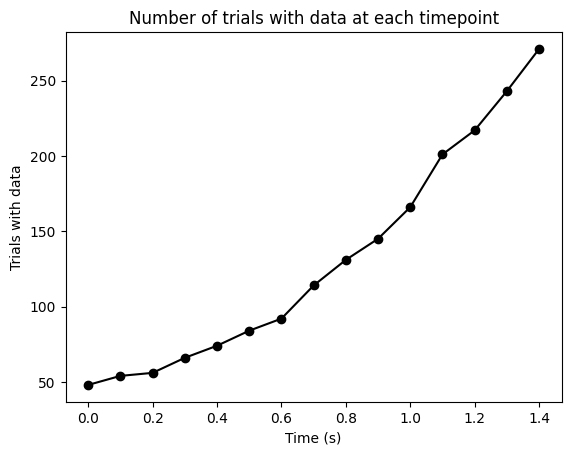

In [ ]:
dec.plot_trial_counts_by_timepoint()  # 

## concat data regression

In [ ]:
# Multivariate linear regression
dec.y_var_lr_df = neural_data_modeling.get_y_var_lr_df(
                dec.concat_neural_trials,
                dec.concat_behav_trials)

In [ ]:
# use_raw_spike_data_instead=True,
# use_lagged_raw_spike_data=True,
# apply_pca_on_raw_spike_data=True,
dec.y_var_lr_df.head(15)

,feature,r,r_squared,p_values,significant
0,target_distance,0.60357,0.36430,0.00000,True
1,segment_start_dummy,0.53259,0.28365,0.00000,True
2,min_ff_distance,0.49838,0.24838,0.00000,True
3,cum_distance_since_target_last_seen,0.49492,0.24495,0.00000,True
4,cum_distance,0.47679,0.22732,0.00000,True
5,new_segment,0.47653,0.22708,0.00000,True
6,segment,0.47638,0.22694,0.00000,True
7,bin,0.47251,0.22327,0.00000,True
8,new_bin,0.46578,0.21695,0.00000,True
9,seg_duration,0.46412,0.21541,0.00000,True


In [ ]:
# use_raw_spike_data_instead = True
dec.y_var_lr_df.head(7)

,feature,r,r_squared,p_values,significant
0,target_distance,0.60357,0.36430,0.00000,True
1,segment_start_dummy,0.53259,0.28365,0.00000,True
2,min_ff_distance,0.49838,0.24838,0.00000,True
3,cum_distance_since_target_last_seen,0.49492,0.24495,0.00000,True
4,cum_distance,0.47679,0.22732,0.00000,True
5,new_segment,0.47653,0.22708,0.00000,True
6,segment,0.47638,0.22694,0.00000,True


In [ ]:
# use_raw_spike_data_instead=True,
# use_lagged_raw_spike_data=True,

dec.y_var_lr_df.head(7)

,feature,r,r_squared,p_values,significant
0,target_distance,0.60357,0.36430,0.00000,True
1,segment_start_dummy,0.53259,0.28365,0.00000,True
2,min_ff_distance,0.49838,0.24838,0.00000,True
3,cum_distance_since_target_last_seen,0.49492,0.24495,0.00000,True
4,cum_distance,0.47679,0.22732,0.00000,True
5,new_segment,0.47653,0.22708,0.00000,True
6,segment,0.47638,0.22694,0.00000,True


In [ ]:
# use_raw_spike_data_instead = False
dec.y_var_lr_df.head(10)

,feature,r,r_squared,p_values,significant
0,target_distance,0.60357,0.36430,0.00000,True
1,segment_start_dummy,0.53259,0.28365,0.00000,True
2,min_ff_distance,0.49838,0.24838,0.00000,True
3,cum_distance_since_target_last_seen,0.49492,0.24495,0.00000,True
4,cum_distance,0.47679,0.22732,0.00000,True
5,new_segment,0.47653,0.22708,0.00000,True
6,segment,0.47638,0.22694,0.00000,True
7,bin,0.47251,0.22327,0.00000,True
8,new_bin,0.46578,0.21695,0.00000,True
9,seg_duration,0.46412,0.21541,0.00000,True


## train-test split by segments

In [ ]:
    # x_var, y_var = pn.get_concat_x_and_y_var_for_lr(test_or_control=test_or_control)
    
    # results_summary = ml_methods_utils.run_segment_split_regression_cv(
    #     x_var, 
    #     y_var, 
    #     columns_of_interest, 
    #     num_folds=5, 
    # )

In [ ]:
from machine_learning.ml_methods import ml_methods_utils

In [ ]:
columns_of_interest = ['target_distance']

x_var = dec.concat_neural_trials
y_var = dec.concat_behav_trials

results_summary = ml_methods_utils.run_segment_split_regression_cv(
    x_var, 
    y_var, 
    columns_of_interest, 
    num_folds=5, 
    segment_column='new_segment',
)

results_summary

,Target,Model,Metric,Mean,Std
0,target_distance,Linear Regression,train_r2,0.36526,0.00292
1,target_distance,Linear Regression,test_r2,0.35282,0.01247
2,target_distance,Linear Regression,train_pearson_r,0.60436,0.00241
3,target_distance,Linear Regression,test_pearson_r,0.60225,0.01115


In [ ]:
wide_df = ml_methods_utils.convert_results_to_wide_df(results_summary, index_columns=['Target', 'Model'])
wide_df

,Target,Model,test_pearson_r_Mean,test_r2_Mean,train_pearson_r_Mean,train_r2_Mean,test_pearson_r_Std,test_r2_Std,train_pearson_r_Std,train_r2_Std
0,target_distance,Linear Regression,0.60225,0.35282,0.60436,0.36526,0.01115,0.01247,0.00241,0.00292


## plot latent dimensions

In [ ]:
plot_gpfa_utils.plot_gpfa_traj_3d_uniform_color(dec.trajectories)


In [ ]:
reload(plot_gpfa_utils)

In [ ]:
# First, enable interactive mode in your notebook
%matplotlib inline

# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create the interactive plot
fig, ax = plot_gpfa_utils.plot_gpfa_traj_3d(
    num_traj_to_plot=30,
    trajectories=dec.trajectories,
    figsize=(15, 5),
    linewidth_single_trial=0.75,
    alpha_single_trial=0.3,
    linewidth_trial_average=2,
    title='Latent dynamics extracted by GPFA',
    view_azim=-5,
    view_elev=60
)

plt.show()

In [ ]:
# fig = plot_gpfa_utils.plot_gpfa_traj_3d_plotly(trajectories)

In [ ]:
# Find variance explained by each latent dimension
traj_stack = np.stack(dec.trajectories, axis=0)  # shape: (n_trials, 3, T)
var_by_dim = np.var(traj_stack, axis=(0, 2))    # variance across trials and time
var_by_dim /= var_by_dim.sum()               # normalize to get explained variance ratio
print("Variance explained by each latent dimension:", var_by_dim)


In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Latent dynamics extracted by GPFA')
ax.set_xlabel('Time [s]')

average_trajectory = np.mean(dec.trajectories, axis=0)
time = np.arange(len(average_trajectory[0])) * dec.bin_width  # assuming all trajectories have the same length

for i, x in enumerate(average_trajectory):
    ax.plot(time, x, label=f'Dim {i+1}')

ax.legend()

plt.tight_layout()
plt.show()


## why poor performance?

In [ ]:
import neural_data_analysis.neural_analysis_tools.gpfa_methods.time_resolved_regression as time_resolved_regression

# 1. Print number of trials per timepoint
time_resolved_regression.print_trials_per_timepoint(dec.gpfa_neural_trials)

# 2. Check for NaNs
time_resolved_regression.check_for_nans_in_trials(dec.gpfa_neural_trials, name='latent')
time_resolved_regression.check_for_nans_in_trials(dec.behav_trials, name='behavioral')

# 3. Standardize trials
latent_trials_std = time_resolved_regression.standardize_trials(dec.gpfa_neural_trials)
behav_trials_std = time_resolved_regression.standardize_trials(dec.behav_trials)

# 4. Print number of points per trial
plot_time_resolved_regression.plot_trial_point_distribution(dec.pursuit_data)

# 5. Plot latent and behavioral variables for a few trials
time_resolved_regression.plot_latents_and_behav_trials(latent_trials_std, behav_trials_std, bin_width=dec.bin_width, n_trials=5)


## hyperparams (still need to debug)

In [ ]:
stop! # this section is not finished yet

# grid search

import itertools
from joblib import Parallel, delayed, cpu_count
print(f"Detected CPU cores: {cpu_count()}")

# # can add for smoothing:
# # other forms of smoothing like (currently it's only uniform_filter1d)
# from scipy.ndimage import gaussian_filter1d
# # gpfa_neural_trials: list of trials, each trial shape (time_bins, n_neurons)
# smoothed_trials = [
#     gaussian_filter1d(trial, sigma=smooth_sigma, axis=0)
#     for trial in gpfa_neural_trials
# ]


# Define your grid
smoothing_windows = [1, 3]
use_sqrt = [True, False]
gpfa_dims = [3, 5]
bin_widths = [0.02]
ridge_alphas = [0.1, 1]
regression_types = ['ridge']
align_at_beginning_opts = [True]
pca_components = [5, 10]

param_grid_gpfa = list(itertools.product(
    smoothing_windows, use_sqrt, gpfa_dims, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts
))

# Baseline configs
param_grid_raw = list(itertools.product(
    smoothing_windows, use_sqrt, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts
))
param_grid_pca = list(itertools.product(
    smoothing_windows, use_sqrt, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts, pca_components
))

# Run GPFA grid
results_gpfa = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, gpfa_dim, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline=None
    )
    for (smoothing, sqrt, gpfa_dim, bin_width, ridge_alpha, regression_type, align_at_beginning) in param_grid_gpfa
)

# Run raw baseline grid
results_raw = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, None, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline='raw'
    )
    for (smoothing, sqrt, bin_width, ridge_alpha, regression_type, align_at_beginning) in param_grid_raw
)

# Run PCA baseline grid
results_pca = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, None, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline='pca', pca_components=pca_comp
    )
    for (smoothing, sqrt, bin_width, ridge_alpha, regression_type, align_at_beginning, pca_comp) in param_grid_pca
)

# Combine all results
all_results = results_gpfa + results_raw + results_pca
df = pd.DataFrame(all_results)
print(df.sort_values('mean_r2', ascending=False).head(10))

In [ ]:
import matplotlib.pyplot as plt
best = df.iloc[df['mean_r2'].idxmax()]
plt.plot(best['times'], np.nanmean(np.array(best['r2_by_time']), axis=1))
plt.xlabel('Time (s)')
plt.ylabel('Mean R²')
plt.title(f"Best config: {best['model']} R² by time")
plt.show()

# Compare models
import seaborn as sns
sns.catplot(data=df, x='model', y='mean_r2', kind='bar')

# ML to decode single vars

## decode

In [ ]:
# neural_data = dec.x_var_lags
# behavioral_data = dec.y_var_reduced

neural_data = dec.concat_neural_trials
behavioral_data = dec.concat_behav_trials

In [ ]:
# General usage for any behavioral variable
decoder = ml_decoder_class.MLBehavioralDecoder()
models_to_use=['rf', 'nn', 'lr']
successful_decodings = {}

for var in ['target_rel_y', 'target_rel_x']:
    result = decoder.decode_variable(neural_data, behavioral_data, var, models_to_use=models_to_use)
    if result is not None:
        successful_decodings[var] = result

best_model, best_results = decoder.get_best_model('target_rel_y', 'test_r2')

# Plot rf results for any variable
decoder.plot_ml_results('target_rel_y', 'rf')

successful_decodings

## compare different Models

Let's compare the performance of different machine learning models.


In [ ]:
comparison_df = eval_target_decoder.compare_models(successful_decodings)

## plot feature importance for RF

In [ ]:
# Analyze feature importance for Random Forest models
for target_var in successful_decodings.keys():
    if 'rf' in successful_decodings[target_var]:
        print(f"\n{'='*50}")
        print(f"FEATURE IMPORTANCE: {target_var}")
        print('='*50)
        
        rf_model = successful_decodings[target_var]['rf']['model']
        
        if hasattr(rf_model, 'feature_importances_'):
            # Get feature importance
            importance_df = regression_utils._get_rf_feature_importances(rf_model, dec.neural_data.columns)
            # Show top 10 most important features
            print(f"Top 10 most important neurons for {target_var}:")
            print(importance_df.head(10))
            
            # Plot feature importance
            regression_utils.plot_feature_importance(importance_df, target_var)


# Save Results (have yet to try)

Finally, let's save our results for future analysis.


In [ ]:
import pickle
import json
import pandas as pd
from typing import Dict, Any

def create_experiment_info(decoder, monkey: str, session: str) -> Dict[str, Any]:
    """Create experiment information dictionary."""
    return {
        'monkey': monkey,
        'session': session,
        'bin_width': decoder.bin_width,
        'neural_data_shape': decoder.neural_data.shape,
        'target_data_shape': decoder.target_data.shape
    }

def create_cca_results(decoder) -> Dict[str, Any]:
    """Create CCA results summary."""
    return {
        'top_3_correlations': (
            decoder.results['cca']['canonical_correlations'][:3].tolist() 
            if 'cca' in decoder.results else None
        )
    }

def find_best_performances(successful_decodings: Dict) -> Dict[str, Dict[str, Any]]:
    """Find best performing model for each target variable."""
    best_performances = {}
    for target_var, models in successful_decodings.items():
        best_model = None
        best_score = -1
        
        for model_name, results in models.items():
            score = results.get('test_r2', results.get('test_accuracy', results.get('cv_mean', 0)))
            if score > best_score:
                best_score = score
                best_model = model_name
        
        best_performances[target_var] = {
            'best_model': best_model,
            'best_score': best_score
        }
    return best_performances

def create_summary_report(decoder, successful_decodings: Dict, monkey: str, session: str) -> Dict[str, Any]:
    """Create complete summary report."""
    return {
        'experiment_info': create_experiment_info(decoder, monkey, session),
        'cca_results': create_cca_results(decoder),
        'ml_results_summary': {
            'successful_targets': list(successful_decodings.keys()),
            'best_performances': find_best_performances(successful_decodings)
        }
    }

def print_summary_report(summary_report: Dict[str, Any]):
    """Print formatted summary report."""
    print("\nEXPERIMENT SUMMARY")
    print("="*50)
    print(f"Neural data shape: {summary_report['experiment_info']['neural_data_shape']}")
    print(f"Target data shape: {summary_report['experiment_info']['target_data_shape']}")
    
    if summary_report['cca_results']['top_3_correlations']:
        print(f"Top 3 CCA correlations: {summary_report['cca_results']['top_3_correlations']}")
    
    print(f"Successfully decoded targets: {summary_report['ml_results_summary']['successful_targets']}")
    
    print("\nBest model performance for each target:")
    for target, perf in summary_report['ml_results_summary']['best_performances'].items():
        print(f"  {target}: {perf['best_model']} (score: {perf['best_score']:.4f})")

def save_experiment_results(decoder, successful_decodings: Dict, monkey: str, session: str, 
                          base_filename: str = None):
    """Save both detailed results and summary report."""
    if base_filename is None:
        base_filename = f"target_decoding_results_{monkey}_{session}"
    
    pkl_filename = f"{base_filename}.pkl"
    json_filename = f"{base_filename}_summary.json"
    
    # Save detailed results
    print("Saving results...")
    decoder.save_results(pkl_filename)
    
    # Create and save summary report
    summary_report = create_summary_report(decoder, successful_decodings, monkey, session)
    print_summary_report(summary_report)
    
    with open(json_filename, 'w') as f:
        json.dump(summary_report, f, indent=2)
    
    print(f"\nResults saved to: {pkl_filename}")
    print(f"Summary saved to: {json_filename}")
    
    return pkl_filename, json_filename

def load_experiment_results(base_filename: str = None, monkey: str = None, session: str = None):
    """Load both detailed results and summary report."""
    if base_filename is None:
        if monkey and session:
            base_filename = f"target_decoding_results_{monkey}_{session}"
        else:
            raise ValueError("Must provide either base_filename or both monkey and session")
    
    pkl_filename = f"{base_filename}.pkl"
    json_filename = f"{base_filename}_summary.json"
    
    try:
        # Load detailed results
        with open(pkl_filename, 'rb') as f:
            decoder_results = pickle.load(f)
        
        # Load summary report
        with open(json_filename, 'r') as f:
            summary_report = json.load(f)
        
        print(f"Loaded results from: {pkl_filename}")
        print(f"Loaded summary from: {json_filename}")
        
        return decoder_results, summary_report
        
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None, None
    except Exception as e:
        print(f"Error loading results: {e}")
        return None, None

# --- Usage Examples ---

# Saving (replaces your original code):
# save_experiment_results(decoder, successful_decodings, 'Bruno', 'data_0328')

# Loading:
# decoder_results, summary_report = load_experiment_results(monkey='Bruno', session='data_0328')
# OR
# decoder_results, summary_report = load_experiment_results(base_filename="target_decoding_results_bruno_0328")

# If you want to print the loaded summary:
# if summary_report:
#     print_summary_report(summary_report)

## save

In [ ]:
# Save everything with one function call
save_experiment_results(decoder, successful_decodings, 'Bruno', 'data_0328')

## retrieve

In [ ]:

# Load everything with one function call
decoder_results, summary_report = load_experiment_results(monkey='Bruno', session='data_0328')
## OR
# decoder_results, summary_report = load_experiment_results(base_filename="target_decoding_results_bruno_0328")

# If you want to print the loaded summary:
if summary_report:
    print_summary_report(summary_report)

# Access successful_decodings
if decoder_results and 'successful_decodings' in decoder_results:
    successful_decodings = decoder_results['successful_decodings']
    # Use with your model comparison functions

# Other thoughts

## more columns (possibly get in the future)

get also get: (but to be honest, it doesn't make that much sense to get them....so let's skip for now.)
'distance traversed since target last visible',
'd angle since target last visible', 'target_at_right',
'time_till_capture', 'time from last visible to capture

Note that there might be multicollinearity. For example, duration from last visible to capture = time since target last visible + time till capture

Similarly, target angle = target angle last seen frozen - d angle since target last visible

(For distance it's not exactly the same because of the difference between distance and distance traversed, but it's still similar)

The multicollinearity is fine in linear regression (when each feature here is a y var), but need to be dealt with in cca.

## possible things to try

should i actually align each section, as if they are trials???
maybe i can try both that and continuous time... both can shed light on different behavioral variables
but for aligning trials, it may require alignment or warping since trial durations vary.

btw, what does it mean to stitch data?

also, what does it look like to use RNN to model it?
I thought about the paper that Noah presented on RNN


btw.......IME

# Misc

## plot trial segments

In [ ]:
## plot trial segments in pursuit_data
from visualization.matplotlib_tools import plot_trials,
dec.make_PlotTrials_args()
plt.rcParams['figure.figsize'] = [10, 10]                     

max_plot_to_make = 2
plot_counter = 0

for index, row in dec.single_vis_target_df.iloc[2:].iterrows():

    duration = [row['last_vis_time'], row['ff_caught_time']]

    returned_info = plot_trials.PlotTrials(
                duration, 
                *dec.PlotTrials_args,  
                adjust_xy_limits=True,       
                minimal_margin=50,
                show_reward_boundary=True,
                show_alive_fireflies=False,
                show_visible_fireflies=True,
                show_in_memory_fireflies=True,
                show_believed_target_positions=True,
                )
    plt.show()
    

    plot_counter += 1
    if plot_counter >= max_plot_to_make:
        break

# exp

In [ ]:
## what the 

In [ ]:
dec.behav_data_by_bin.head(3)

In [ ]:
import numpy as np
import pandas as pd

# Custom function for mode (returns first mode if multiple)
def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else pd.NA

# Define strict median function
def strict_median(series, method='lower'):
    sorted_vals = np.sort(series.dropna().values)
    n = len(sorted_vals)
    if n == 0:
        return np.nan
    elif n % 2 == 1:
        return sorted_vals[n // 2]
    else:
        if method == 'lower':
            return sorted_vals[n // 2 - 1]
        elif method == 'upper':
            return sorted_vals[n // 2]
        else:
            raise ValueError("method must be 'lower' or 'upper'")

# Define column groups
col_max = ['target_visible_dummy', 'target_cluster_visible_dummy', 'capture_target_dummy',
           'num_visible_ff', 'any_ff_visible', 'catching_ff']
col_strict_median = ['point_index', 'valid_view_point']

# Combine aggregation functions
agg_funcs = {col: 'max' for col in col_max}
agg_funcs.update({col: strict_median for col in col_strict_median})

# Perform groupby
result = df.groupby('bin').agg(agg_funcs).reset_index()

# Drop unwanted columns (corrected)
result = result.drop(columns=[
    'target_index', 
    'target_has_disappeared_for_last_time_dummy', 
    'target_cluster_has_disappeared_for_last_time_dummy'
])

# Merge back relevant columns (corrected)
result = result.merge(
    df[['point_index', 'target_index', 'target_has_disappeared_for_last_time_dummy', 
        'target_cluster_has_disappeared_for_last_time_dummy']],
    on='point_index',
    how='left'
)

In [ ]:
# through merge
'target_index', 'target_has_disappeared_for_last_time_dummy', 'target_cluster_has_disappeared_for_last_time_dummy'

In [ ]:
# max
col_max = ['target_visible_dummy', 'target_cluster_visible_dummy', 'capture_target_dummy',
           'num_visible_ff', 'any_ff_visible', 'catching_ff']

# strict median
col_strict_median = ['point_index', 'valid_view_point']


agg_funcs = {
 col: 'max' for col in col_max,
 col: 'strict_median' for col in col_strict_median,
}


In [ ]:
# Custom function for mode (returns first mode if multiple)
def get_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else pd.NA

def strict_median(series, method='lower'):
    sorted_vals = np.sort(series.dropna().values)
    n = len(sorted_vals)
    if n == 0:
        return np.nan
    elif n % 2 == 1:
        return sorted_vals[n // 2]
    else:
        if method == 'lower':
            return sorted_vals[n // 2 - 1]
        elif method == 'upper':
            return sorted_vals[n // 2]
        else:
            raise ValueError("method must be 'lower' or 'upper'")
        
# Specify aggregations
agg_funcs = {
    
}

# Get list of remaining columns to apply median
remaining_cols = [col for col in df.columns if col not in ['group'] + list(agg_funcs)]
for col in remaining_cols:
    agg_funcs[col] = 'median'

# Perform groupby
result = df.groupby('bin').agg(agg_funcs).reset_index()


In [ ]:
dec.behav_data_by_bin.groupby('target_index').count()

In [ ]:
dec.ff_caught_T_new.shape